In [142]:
%%writefile requirements.txt
numpy
pandas==2.2.3
pyyaml==6.0.2
matplotlib==3.10.0
scikit-learn==1.6.1
tqdm==4.67.1
ipykernel
import_ipynb

Overwriting requirements.txt


In [143]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [144]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import yaml
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import SplineTransformer
from sklearn.calibration import CalibratedClassifierCV


In [145]:
X_train = pd.read_csv("X_train_scaled.csv")
X_test  = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv")["Loan Status"]
y_test  = pd.read_csv("y_test.csv")["Loan Status"]

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (71828, 26) X_test: (17957, 26)
y_train: (71828,) y_test: (17957,)


In [146]:
# Initialize the logistic regression model
model = LogisticRegression(penalty = "l2", C = 1.0, random_state = 16, solver='liblinear', max_iter=1000)
    
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16, solver='liblinear')

In [147]:
y_prob = model.predict_proba(X_test)[:, 1]   # probabilities in [0,1]
y_pred = (y_prob >= 0.5).astype(int)         # choose your threshold

In [148]:
#Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
num = conf_matrix[0][0]+conf_matrix[1][1]
denom = conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1]
print(num/denom)

0.8000222754357632
0.8000222754357632


In [149]:
#Calculate precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
num = conf_matrix[1][1]
denom = conf_matrix[1][1]+conf_matrix[0][1]
print(num/denom)

0.7898986327204149
0.7898986327204149


In [150]:
#Calculate recall
recall = metrics.recall_score(y_test,y_pred)
print(recall)

num = conf_matrix[1][1]
denom = conf_matrix[1][1]+conf_matrix[1][0]
print(num/denom)

0.9980638915779284
0.9980638915779284


In [151]:
#Calculate average precision
average_precision = metrics.average_precision_score(y_test, y_pred)
print(average_precision)

0.7898172066496308


In [152]:
#Calculate F1 score
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)

f1 = 2*precision*recall/(precision+recall)
print(f1)

0.8818633417771491
0.8818633417771491


0.2126766784452297


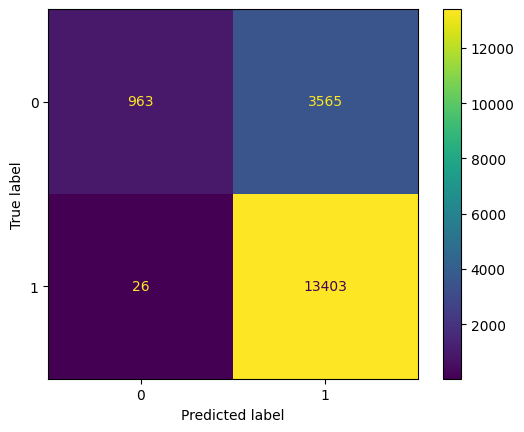

In [153]:
#Calculate specificity
num = conf_matrix[0][0]
denom = conf_matrix[0][0]+conf_matrix[0][1]
print(num/(denom))

#Visualize confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [154]:
#Calculate ROC score
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)


AUROC: 0.7543995781241324


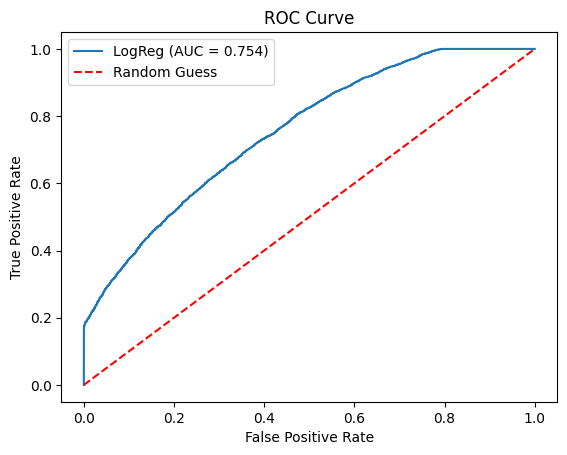

In [155]:
from sklearn.metrics import roc_auc_score, roc_curve

auroc = roc_auc_score(y_test, y_prob)
print("AUROC:", auroc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auroc:.3f})")
plt.plot([0,1],[0,1],'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

0.605370285011579


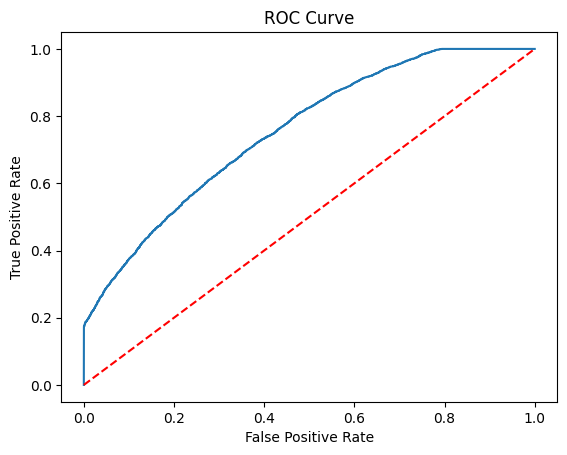

In [156]:
#Calculate AUROC score
auroc = metrics.roc_auc_score(y_test, y_pred, labels = [-1,1])
print(auroc)

#Visualize ROC curve/AUROC score
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = f'{model} (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
#logistic regression


In [158]:
#set up cross-validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [159]:
#define hyperparameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga']
}
#set up grid search
grid_search = GridSearchCV(model, param_grid, cv = cv, scoring = 'accuracy', n_jobs = -1)

#run it
grid_search.fit(X_train, y_train)

#best hyperparameters
print("Best Parameters: ", grid_search.best_params_)
print("Best CV accuracy: ", grid_search.best_score_)

/Users/finleychen/Desktop/Loan-Risk-Prediction/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/finleychen/Desktop/Loan-Risk-Prediction/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/finleychen/Desktop/Loan-Risk-Prediction/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/finleychen/Desktop/Loan-Risk-Prediction/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/finleychen/Desktop/Loan-Risk-Prediction/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: T

Best Parameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy:  0.798128875759997
